In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
print('Mean of Age:', round(df.age.mean()))
print('Male Ratio:', round(df.sex.mean(), 2))
print('Female Ratio:', round(1 - df.sex.mean(), 2))

Mean of Age: 54
Male Ratio: 0.68
Female Ratio: 0.32


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


c:\python 3.8.2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


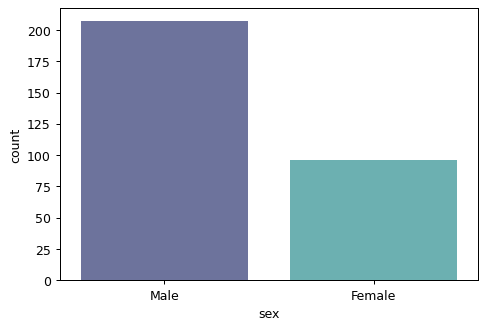

In [6]:
# How many female & male?

plt.figure(dpi = 90)
sex_data = df.sex.map({1: 'Male', 0: 'Female'})
sns.countplot(sex_data, palette = 'mako', alpha = 0.8)
plt.show()

c:\python 3.8.2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


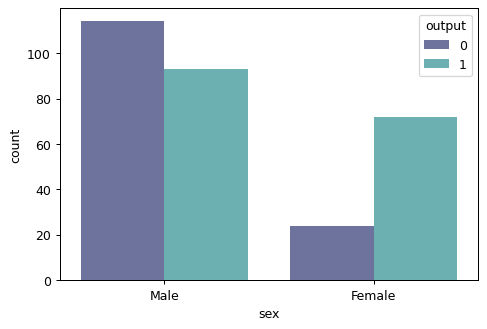

In [7]:
# How many female & male based on target value (output)?

plt.figure(dpi = 90)
sex_data = df.sex.map({1: 'Male', 0: 'Female'})
sns.countplot(sex_data, hue = df.output, palette = 'mako', alpha = 0.8)
plt.show()

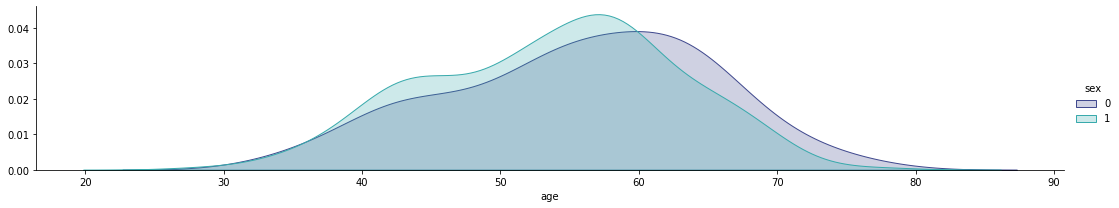

In [8]:
# Age based on sex

fig = sns.FacetGrid(df, palette = 'mako', hue = 'sex', aspect = 5)
fig.map(sns.kdeplot, 'age', shade = True, palette = 'mako')
fig.add_legend()
plt.show()

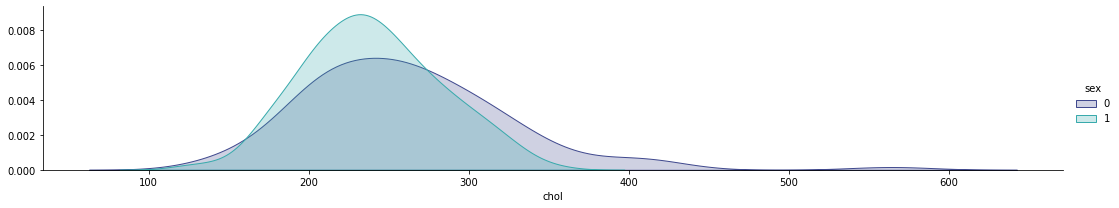

In [9]:
# Cholesterol based on sex

fig = sns.FacetGrid(df, palette = 'mako', hue = 'sex', aspect = 5)
fig.map(sns.kdeplot, 'chol', shade = True, palette = 'mako')
fig.add_legend()
plt.show()

# 

## Prediction : 

In [10]:
from sklearn.model_selection import train_test_split

X = df.drop('output', axis = 1)
Y = df['output']
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state = 10)

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

std = StandardScaler()
std.fit(x_train)
x_train = std.transform(x_train)
x_test = std.transform(x_test)

In [16]:
from sklearn.linear_model import LogisticRegression

logReg = LogisticRegression()
logReg.fit(x_train, y_train)

LogisticRegression()

In [17]:
print('LogReg Train')
y_pred = logReg.predict(x_train)
print(classification_report(y_pred, y_train))

print('LogReg Test')
y_pred = logReg.predict(x_test)
print(classification_report(y_pred, y_test))

LogReg Train
              precision    recall  f1-score   support

           0       0.80      0.87      0.83        90
           1       0.91      0.86      0.88       137

    accuracy                           0.86       227
   macro avg       0.86      0.86      0.86       227
weighted avg       0.87      0.86      0.86       227

LogReg Test
              precision    recall  f1-score   support

           0       0.68      0.85      0.76        33
           1       0.86      0.70      0.77        43

    accuracy                           0.76        76
   macro avg       0.77      0.77      0.76        76
weighted avg       0.78      0.76      0.76        76

